In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ML Regression").getOrCreate()


In [3]:
spark

In [23]:
house_df = spark.read.format("com.databricks.spark.csv").options(header='true', inferschema='true').load('HousingData.csv')

In [24]:
house_df.printSchema()
#house_df.cache()

root
 |-- CRIM: string (nullable = true)
 |-- ZN: string (nullable = true)
 |-- INDUS: string (nullable = true)
 |-- CHAS: string (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: string (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: string (nullable = true)
 |-- MEDV: double (nullable = true)



In [30]:
from pyspark.sql.functions import col 
house_df=house_df.withColumn("CRIM",col("CRIM").cast('double'))
house_df=house_df.withColumn("ZN",col("ZN").cast('double'))
house_df=house_df.withColumn("INDUS",col("INDUS").cast('double'))
house_df=house_df.withColumn("CHAS",col("CHAS").cast('double'))
house_df=house_df.withColumn("AGE",col("AGE").cast('double'))
house_df=house_df.withColumn("LSTAT",col("LSTAT").cast('double'))

house_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [31]:
house_df.count()

506

In [32]:
house_df.take(1)

[Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1, TAX=296, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)]

In [33]:
#Perform descriptive analytics
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,486,3.6118739711934156,8.7201918501516,0.00632,88.9762
ZN,486,11.2119341563786,23.388876146265478,0.0,100.0
INDUS,486,11.083991769547332,6.835896498641436,0.46,27.74
CHAS,486,0.06995884773662552,0.255340480906568,0.0,1.0
NOX,506,0.5546950592885372,0.11587767566755584,0.385,0.871
RM,506,6.284634387351787,0.7026171434153232,3.561,8.78
AGE,486,68.51851851851852,27.999513005092354,2.9,100.0
DIS,506,3.795042687747034,2.10571012662761,1.1296,12.1265
RAD,506,9.549407114624506,8.707259384239366,1,24


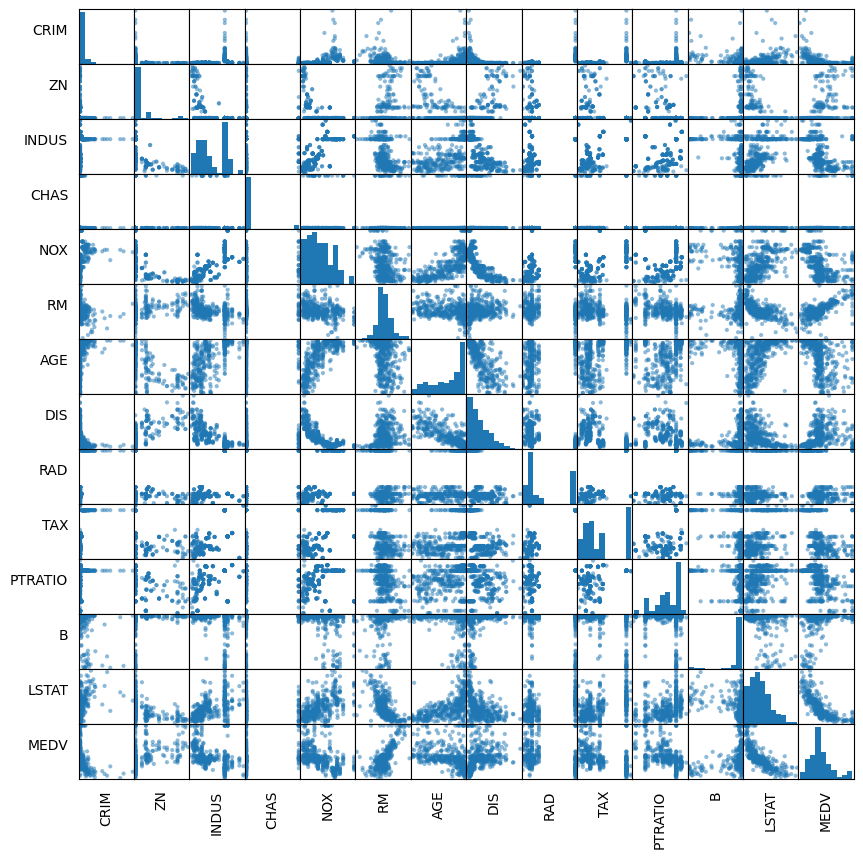

In [34]:
#determine if we have a linear correlation between multiple independent variables
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in housing_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = housing_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())



In [35]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to MEDV for ", i, house_df.stat.corr('MEDV',i))

Correlation to MEDV for  CRIM -0.38412049951932825
Correlation to MEDV for  ZN 0.36229247162187805
Correlation to MEDV for  INDUS -0.44137144862816985
Correlation to MEDV for  CHAS 0.18384443942540873
Correlation to MEDV for  NOX -0.4273207723732821
Correlation to MEDV for  RM 0.6953599470715401
Correlation to MEDV for  AGE -0.3566992455635852
Correlation to MEDV for  DIS 0.249928734085904
Correlation to MEDV for  RAD -0.38162623063977735
Correlation to MEDV for  TAX -0.46853593356776674
Correlation to MEDV for  PTRATIO -0.5077866855375622
Correlation to MEDV for  B 0.3334608196570661
Correlation to MEDV for  LSTAT -0.6954050666730762
Correlation to MEDV for  MEDV 1.0


In [22]:
house_df.show(3)
house_df.printSchema()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   CRIM| ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 3 rows

root
 |-- CRIM: string (nullable = true)
 |-- ZN: string (nullable = true)
 |-- INDUS: string (nullable = true)
 |-- CHAS: string (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: string (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = tr

In [45]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.setHandleInvalid("skip").transform(house_df)
vhouse_df = vhouse_df.select(['features', 'MEDV'])
vhouse_df.show(3)

+--------------------+----+
|            features|MEDV|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [46]:
#Train and test split

splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

# Linear Regression

In [47]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.03937870313780122,0.0069540023436936455,0.0,0.40909633320989286,-7.381124026474974,6.030725165739228,-0.017991939543030088,-0.39241883783127873,0.0,-0.005008039286004857,-0.8957700520647455,0.006414751969191028,-0.20483171696611155]
Intercept: 10.018001223500146


In [48]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 3.952977
r2: 0.809156


In [51]:
#testing Set 

lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MEDV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MEDV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|MEDV|            features|
+------------------+----+--------------------+
|28.642159249182143|22.0|[0.01096,55.0,2.2...|
|17.557847406181544|18.9|[0.0136,75.0,4.0,...|
|31.692221340251503|31.6|[0.01432,100.0,1....|
| 28.16334904631444|30.1|[0.01709,90.0,2.0...|
| 31.79150143776949|32.9|[0.01778,95.0,1.4...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.53631


In [52]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 6.3369


In [53]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.49999999999999956, 0.42171109520863614, 0.1842466189380508, 0.16347251854811573, 0.13512412920774355, 0.13345823500226364, 0.13244628075900508, 0.13179457721524301, 0.13159528055689107, 0.13150873483611175, 0.13149122983074915]
+-------------------+
|          residuals|
+-------------------+
|-5.3841218066718355|
|-0.7866094373653922|
|-0.4190100377188486|
|  3.432802839708401|
| 10.096977995092615|
|-1.6409472208060016|
|-3.7185987375590166|
|  8.165783527928383|
|     8.037067799389|
|-3.2127744556997477|
|   4.64926395762642|
| 4.6328178243190195|
| -9.974735395817913|
|-3.5014080989928402|
|  2.161365465200813|
|-0.9002064679213078|
| -3.219403187098301|
|  4.040849193970544|
| -1.177753074707855|
|-3.5305750181440025|
+-------------------+
only showing top 20 rows



In [55]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MEDV","features").show()

+------------------+----+--------------------+
|        prediction|MEDV|            features|
+------------------+----+--------------------+
|28.642159249182143|22.0|[0.01096,55.0,2.2...|
|17.557847406181544|18.9|[0.0136,75.0,4.0,...|
|31.692221340251503|31.6|[0.01432,100.0,1....|
| 28.16334904631444|30.1|[0.01709,90.0,2.0...|
| 31.79150143776949|32.9|[0.01778,95.0,1.4...|
| 41.10080358998289|50.0|[0.02009,95.0,2.6...|
| 26.12823836871638|24.7|[0.02055,85.0,0.7...|
|31.375231373358456|34.7|[0.02729,0.0,7.07...|
|25.426918002111474|21.6|[0.02731,0.0,7.07...|
| 25.57710955651284|28.7|[0.02985,0.0,2.18...|
| 19.64412776636987|18.5|[0.03041,0.0,5.19...|
|29.702797757443268|33.4|[0.03237,0.0,2.18...|
| 31.81277464126981|34.9|[0.03359,75.0,2.9...|
| 20.04619823454211|19.5|[0.03427,0.0,5.19...|
| 22.94097315060937|20.7|[0.03738,0.0,5.19...|
|36.126609975035464|34.6|[0.03768,80.0,1.5...|
|26.148802714781905|23.2|[0.03871,52.5,5.3...|
| 26.03890329419747|22.0|[0.03932,0.0,3.41...|
| 27.92805984

In [58]:
#Decision Tree

from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'MEDV')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="MEDV", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 5.54654


In [66]:
#
dt_model.featureImportances
pd.DataFrame(dt_model.featureImportances.toArray()).sort_values(by=['0'])

KeyError: '0'

In [60]:
house_df.take(1)

[Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1, TAX=296, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)]